In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disaster-tweets/tweets.csv


> ****Importing required libraries****

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection,naive_bayes
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split                
from sklearn.tree import DecisionTreeClassifier                     
from sklearn.metrics import accuracy_score                          
from sklearn.metrics import classification_report                   
from sklearn import tree   
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import keras

import re    
import nltk  
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet

from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
df = pd.read_csv('../input/disaster-tweets/tweets.csv')
df

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


> **Cleaning Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


In [5]:
df.isnull().sum()

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

In [6]:
print(len(pd.unique(df['keyword'])))

219


In [7]:
target_df = df.target.value_counts().reset_index()
target_df.columns = ['target', 'count']
fig = px.pie(target_df, values='count', names='target', title='Target Classification',
             color_discrete_sequence=['red', 'light blue'])
fig.show()

In [8]:
from stop_words import get_stop_words
from nltk.corpus import stopwords

stop_words = list(get_stop_words('en'))        
nltk_words = list(stopwords.words('english')) 
stop_words.extend(nltk_words)

words = [w for w in df.text if not w in stop_words]
df['words'] = words

In [9]:
import string
import re

def remove_url(words):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", words)

def remove_ablazeWord(words):
    return words.replace("ablaze", "")

def remove_punct(words):
    translator = str.maketrans("", "", string.punctuation)
    return words.translate(translator)

def remove_tripleDot(words):
    return words.replace('\u2026', "")

def remove_emojis(words):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',words)

In [10]:
df["words"] = df.words.map(remove_url)
df["words"] = df.words.map(remove_punct)
df["words"] = df.words.map(remove_tripleDot)
df["words"] = df.words.map(remove_emojis)
df["words"] = df.words.map(remove_ablazeWord)

> **Tokenization, Lemmatization, Stemming**

In [11]:
import nltk
from nltk.tokenize import word_tokenize
df['words'] = [word_tokenize(entry) for entry in df['words']]
df['words'].head()

0    [Communal, violence, in, Bhainsa, Telangana, S...
1    [Telangana, Section, 144, has, been, imposed, ...
2               [Arsonist, sets, cars, at, dealership]
3               [Arsonist, sets, cars, at, dealership]
4    [Lord, Jesus, your, love, brings, freedom, and...
Name: words, dtype: object

In [12]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['j'] = wn.ADJ
tag_map['v'] = wn.VERB
tag_map['v'] = wn.ADV

In [13]:
stop_words = set(stopwords.words("english"))
print(stop_words)

{"that'll", 'to', 'yours', 'above', 'which', "it's", 'a', 'and', 'hadn', 'y', "you're", 'won', 'again', 'doing', 'about', 'our', 'it', 'be', 'theirs', "aren't", 'is', 'why', 'too', 'into', 'having', 'own', 'herself', 'itself', 'did', 'not', 'under', 'do', 'are', 'some', 'there', 'her', 'for', 'so', "haven't", 't', 'i', 'will', "weren't", 'weren', 'whom', 'needn', "shan't", "needn't", 'any', 'but', 'nor', "shouldn't", "mustn't", 'o', 'shan', "you'll", 've', "she's", 'up', 'does', 'you', 'we', 'your', 'don', "doesn't", 'wasn', 'were', 'below', 'very', 'being', 'while', 'at', 'by', 'me', 'isn', 'off', 'in', 'had', 'ma', 'their', 'down', 'more', "you'd", 'hers', 'has', 'himself', 'wouldn', "you've", 'who', 'have', 'after', 'hasn', 'themselves', 'what', 'them', 'only', 'here', 'ain', 'those', "wasn't", 'been', 'if', "couldn't", 'yourselves', 'they', 'where', 'doesn', "mightn't", 'couldn', "isn't", 'because', 'on', 'against', 'all', 'his', 'most', 'until', 'of', 'during', 'as', 'aren', 'didn

In [14]:
for index,entry in enumerate(df['words']):
    new_words = []
    word_lemmstized = WordNetLemmatizer()
    for word,tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_stemmed = word_lemmstized.lemmatize(word,tag_map[tag[0]])
            new_words.append(word_stemmed)
    df.loc[index,'words_final'] = str(new_words)

In [15]:
df_final = df.drop(['text', 'location', 'words'], axis=1)

In [16]:
df_final.head()

,id,keyword,target,words_final
0,0,ablaze,1,"['Communal', 'violence', 'Bhainsa', 'Telangana..."
1,1,ablaze,1,"['Telangana', 'Section', 'imposed', 'Bhainsa',..."
2,2,ablaze,1,"['Arsonist', 'set', 'car', 'dealership']"
3,3,ablaze,1,"['Arsonist', 'set', 'car', 'dealership']"
4,4,ablaze,0,"['Lord', 'Jesus', 'love', 'brings', 'freedom',..."


In [17]:
df_final["wordcount"] = df_final.words_final.str.split().map(lambda x: len(x))
df_final

,id,keyword,target,words_final,wordcount
0,0,ablaze,1,"['Communal', 'violence', 'Bhainsa', 'Telangana...",11
1,1,ablaze,1,"['Telangana', 'Section', 'imposed', 'Bhainsa',...",11
2,2,ablaze,1,"['Arsonist', 'set', 'car', 'dealership']",4
3,3,ablaze,1,"['Arsonist', 'set', 'car', 'dealership']",4
4,4,ablaze,0,"['Lord', 'Jesus', 'love', 'brings', 'freedom',...",12
...,...,...,...,...,...
11365,11365,wrecked,0,"['Media', 'warned', 'u', 'well', 'advance', 'T...",12
11366,11366,wrecked,0,"['feel', 'directly', 'attacked', 'consider', '...",13
11367,11367,wrecked,0,"['feel', 'directly', 'attacked', 'consider', '...",13
11368,11368,wrecked,0,"['ok', 'remember', 'outcast', 'nd', 'dora', 'a...",15


In [18]:
df1 = df_final[df_final['target'] == 1]
df0 = df_final[df_final['target'] == 0]

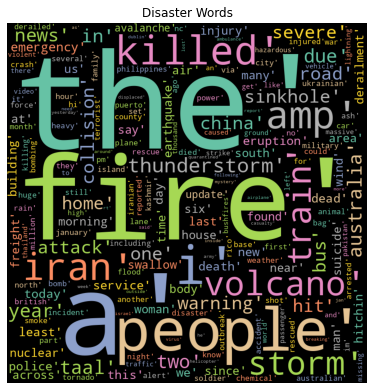

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
  
# iterate through the csv file
for val in df1.words_final:
    
    
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10,
                colormap='Set2', collocations=False).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Disaster Words")
plt.show() 

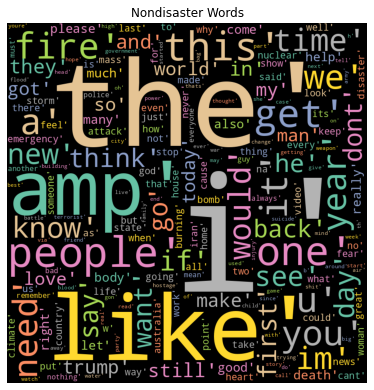

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
  
# iterate through the csv file
for val in df0.words_final:
    
    
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10,
                colormap='Set2', collocations=False).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Nondisaster Words")

plt.show() 

201


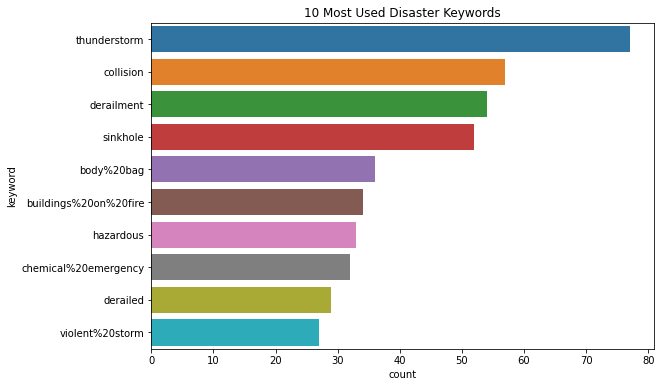

In [21]:
print(df1.keyword.nunique())

plt.figure(figsize = (9,6))
sns.countplot(y= df1.keyword, order = df1.keyword.value_counts().iloc[:10].index)
plt.title('10 Most Used Disaster Keywords')
plt.show()


219


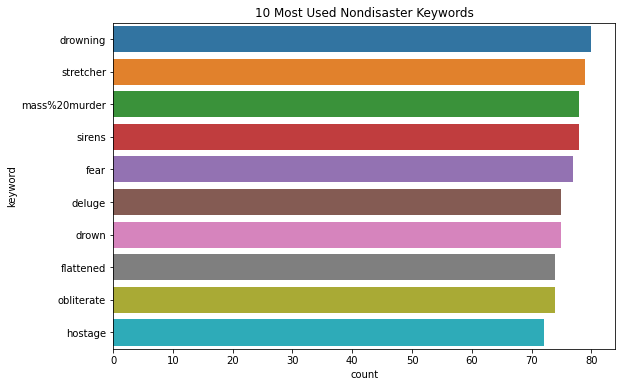

In [22]:
print(df0.keyword.nunique())

plt.figure(figsize = (9,6))
sns.countplot(y= df0.keyword, order = df0.keyword.value_counts().iloc[:10].index)
plt.title('10 Most Used Nondisaster Keywords')
plt.show()

In [23]:
df_encoded = df_final.copy(deep = True)
le_gen = LabelEncoder()
df_encoded['keyword'] = le_gen.fit_transform(df_final['keyword'])

In [24]:
df_encoded

,id,keyword,target,words_final,wordcount
0,0,0,1,"['Communal', 'violence', 'Bhainsa', 'Telangana...",11
1,1,0,1,"['Telangana', 'Section', 'imposed', 'Bhainsa',...",11
2,2,0,1,"['Arsonist', 'set', 'car', 'dealership']",4
3,3,0,1,"['Arsonist', 'set', 'car', 'dealership']",4
4,4,0,0,"['Lord', 'Jesus', 'love', 'brings', 'freedom',...",12
...,...,...,...,...,...
11365,11365,218,0,"['Media', 'warned', 'u', 'well', 'advance', 'T...",12
11366,11366,218,0,"['feel', 'directly', 'attacked', 'consider', '...",13
11367,11367,218,0,"['feel', 'directly', 'attacked', 'consider', '...",13
11368,11368,218,0,"['ok', 'remember', 'outcast', 'nd', 'dora', 'a...",15


In [25]:
Train_X,Test_X,Train_Y,Test_Y = model_selection.train_test_split(df_final['words_final'],df_final['target'],test_size = 0.3)
encoder = LabelEncoder()
Train_Y = encoder.fit_transform(Train_Y)
Test_Y = encoder.fit_transform(Test_Y)

Tfidf_vect = TfidfVectorizer(max_features = 5000)
Tfidf_vect.fit(df_final['words_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

logreg = LogisticRegression(solver='liblinear')
logreg.fit(Train_X_Tfidf,Train_Y)


LogisticRegression(solver='liblinear')

In [26]:
predictions = logreg.predict(Test_X_Tfidf)

In [27]:
predictions

array([0, 1, 0, ..., 0, 0, 0])

In [28]:
print("Accuracy : ", accuracy_score(predictions,Test_Y))

Accuracy :  0.86103781882146
